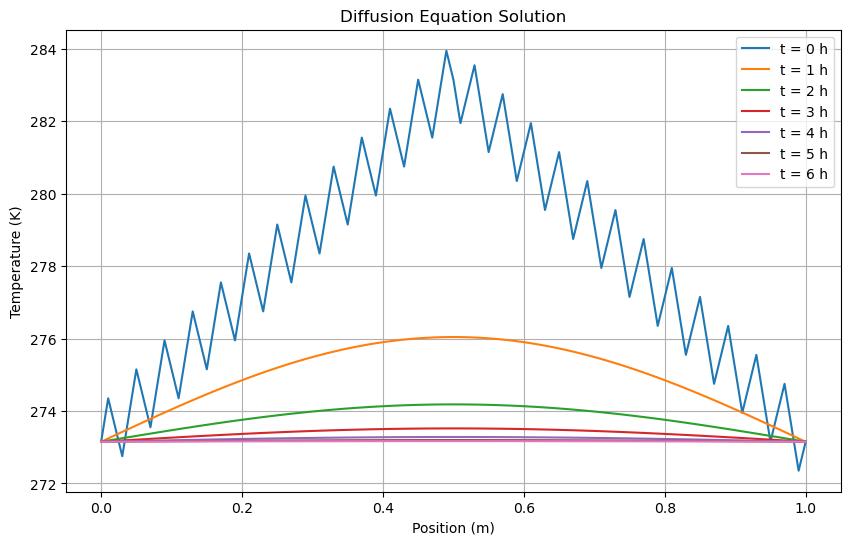

In [23]:
import numpy as np
import matplotlib.pyplot as plt


K = 2.9E-5  
dx = 0.01  
temp0 = 273.15  
t0 = 0
t1 = 6 * 3600
tp = 3600
x0 = 0
x1 = 1


dt = (dx**2) / (2 * K) * 0.5   

nx = int((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)


def IC(x):
    if x <= 0.5:
        return 273.15 + 20*x + np.sin(50*np.pi*x)
    else:
        return 273.15 + 20 - 20*x + np.sin(50*np.pi*x)

phi = np.array([IC(xi) for xi in x])
phi_n1 = np.copy(phi)


def diffusion(phi_n, phi_n1, mult):
    phi_n1[0] = temp0
    phi_n1[-1] = temp0
    phi_n1[1:-1] = phi_n[1:-1] + mult * (phi_n[2:] - 2.0*phi_n[1:-1] + phi_n[:-2])
    return phi_n1

mult = K * dt / (dx**2)
t = t0
tc = 0

plt.figure(figsize=(10, 6))
plt.xlabel("Position (m)")
plt.ylabel("Temperature (K)")
plt.title("Diffusion Equation Solution")

plt.plot(x, phi, label="t = 0 h")

while t < t1:
    phi_n1 = diffusion(phi, phi_n1, mult)
    phi[:] = phi_n1[:]
    t = t + dt

    if abs(t % tp) < dt:
        tc = tc + 1
        plt.plot(x, phi, label=f"t = {round(t/3600)} h")

plt.legend()
plt.grid(True)
plt.show()
